## Naive Bayes Classification Animation (Dataset Growing Over Time)

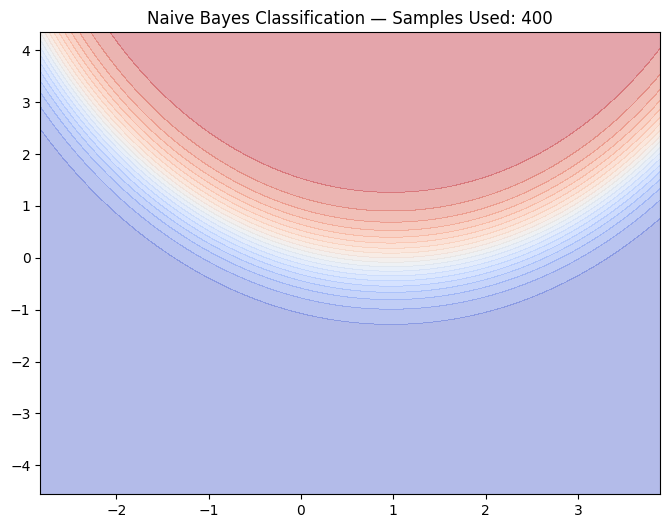

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Create GIF folder
os.makedirs("gifs", exist_ok=True)

# Generate 2D classification dataset
X, y = make_classification(
    n_samples=400, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Shuffle for incremental reveal
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# Grid for predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Number of points shown per frame
increments = 10
frames = len(X) // increments

fig, ax = plt.subplots(figsize=(8, 6))

# Initial scatter (empty)
scatter = ax.scatter([], [], c=[], cmap="coolwarm", s=30)

def update(frame):
    # Remove all existing contours safely
    while ax.collections:
        ax.collections[-1].remove()

    n_points = (frame + 1) * increments

    X_partial = X[:n_points]
    y_partial = y[:n_points]

    scatter.set_offsets(X_partial)
    scatter.set_array(y_partial)

    model = GaussianNB()
    model.fit(X_partial, y_partial)

    # Predict probabilities on grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Draw updated probability regions
    ax.contourf(xx, yy, probs, levels=20, cmap="coolwarm", alpha=0.4)

    ax.set_title(f"Naive Bayes Classification — Samples Used: {n_points}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

ani = FuncAnimation(fig, update, frames=frames, interval=300)

# Save animation
ani.save("gifs/naive_bayes_classification.gif", writer="pillow")

plt.show()
